### Question 1. The data set need cleaning. Decide what to do with missing values and extra attributes.

**Answer - Cleaning the data required accordingly. Some examples of data cleaning that I cleaned is dropping NaN, considering speed limit only divisble by 5, etc.**

In [129]:
import pandas as pd
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv('Traffic_Crashes_Crashes.csv')
#cleaning all the data for the columns that using
df['CRASH_YEAR'] = pd.DatetimeIndex(df['CRASH_DATE']).year #seperating crash year from crash date
df = df[df['INJURIES_FATAL'].notnull()] #dropping NaN
df = df[df['WEATHER_CONDITION'] != 'UNKNOWN'] #dropping unknown
df = df[df['ROAD_DEFECT'] != 'UNKNOWN'] #dropping unknown
df = df[df['LIGHTING_CONDITION'] != 'UNKNOWN'] #dropping unknown
df.HIT_AND_RUN_I = df.HIT_AND_RUN_I.fillna('N') #replacing all the empty space to N("No")
df.INTERSECTION_RELATED_I = df.HIT_AND_RUN_I.fillna('N') #replacing all the empty space to N("No")
newdf = df[df['POSTED_SPEED_LIMIT'] % 5 !=  0].index # Cleaning speed limit data
df.drop(newdf, inplace=True) #Cleaning speed limit data
print(df)

                                          CRASH_RECORD_ID     CRASH_DATE  \
0       073682ef84ff827659552d4254ad1b98bfec24935cc9cc...  10/2/18 18:30   
1       1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...  6/27/19 16:00   
2       009e9e67203442370272e1a13d6ee51a4155dac65e583d...  6/30/17 16:00   
3       00e47f189660cd8ba1e85fc63061bf1d8465184393f134...  3/21/19 22:50   
4       0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...  3/26/18 14:23   
...                                                   ...            ...   
446802  e481dd27bc76e18b9a627f605d6d62c5750bca3311222a...  7/28/20 16:00   
446803  df74080be8ceeb327edd744a7f34507bc32c3f76a3f00c...  7/29/20 14:00   
446804  f2ad41aeabd38b5c073f887c66ba64118d1c8843395d5c...  7/29/20 10:50   
446805  fcc0426860ee85a4e6db60be5572d317452eb63506d0df...  7/29/20 18:30   
446806  f829a8bd9a1afc120ed6720cdb20a22b1a90b81278002b...    1/6/20 8:30   

        POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0           

### Question 2. Some attributes are more useful if you break them into several attributes. An example of this is already included in the data set where the time, day, and month of the crash are given as separate attributes. These attributes allow you to compare crashes based on the day of the week, time, or month (season). Are there other attributes that you can break down into smaller attributes to gain more information from?


**Answer - I did break CRASH_DATE attribute into smaller chuck by only getting the CRASH_YEAR since I wanted to check the fatality by year.**

### Question 3. What are some insights about the crashes and date/time? You can look into season, day of the week, day/night, lightning, weather, etc.

**Answer - I am comparing the crash by weather condition in june and january, and trying to get the insights if the weather plays any role to number of crash. By looking at the below graph we can say even though the total number of crashes is less in clear weather in winter compared to summer but still most 
crashes are happening in clear weather.**

WEATHER_CONDITION
CLEAR                     32016
CLOUDY/OVERCAST             919
FOG/SMOKE/HAZE               98
FREEZING RAIN/DRIZZLE         9
OTHER                        60
RAIN                       3166
SEVERE CROSS WIND GATE        2
SNOW                          6
Name: WEATHER_CONDITION, dtype: int64


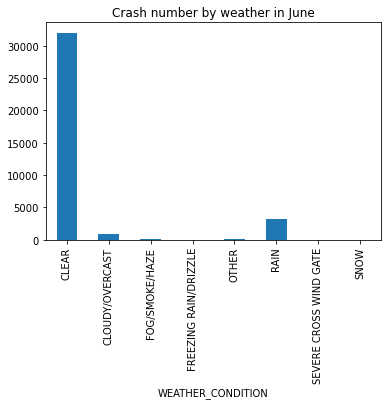

In [122]:
data = df[['CRASH_MONTH','CRASH_DAY_OF_WEEK','WEATHER_CONDITION']]
crashJune = data.loc[(df['CRASH_MONTH'] == 6)]
crashJune = crashJune.groupby(['WEATHER_CONDITION' ])['WEATHER_CONDITION'].count()
print(crashJune)

crashJune.plot(x ='WEATHER_CONDITION', title ='Crash number by weather in June', kind = 'bar')

WEATHER_CONDITION
BLOWING SNOW                 12
CLEAR                     23368
CLOUDY/OVERCAST            1404
FOG/SMOKE/HAZE              183
FREEZING RAIN/DRIZZLE       118
OTHER                       293
RAIN                       2470
SEVERE CROSS WIND GATE       11
SLEET/HAIL                  210
SNOW                       4516
Name: WEATHER_CONDITION, dtype: int64


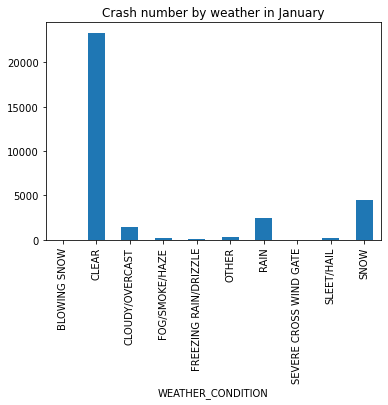

In [123]:
data = df[['CRASH_MONTH','CRASH_DAY_OF_WEEK','WEATHER_CONDITION']]
crashJan = data.loc[(df['CRASH_MONTH'] == 1)]
crashJan = crashJan.groupby(['WEATHER_CONDITION' ])['WEATHER_CONDITION'].count()
print(crashJan)

crashJan.plot(x ='WEATHER_CONDITION', title ='Crash number by weather in January', kind = 'bar')

### Question 4. Has number of deadly crashes increased recently? Look at the data over the years. Can you identify any significant increase/decrease?


**Answer - Yes, we can clearly see the deadly crashes has constantly been increasing year by year. There was a sudden increase in 2017 compared to 2016. In 2019, it dropped little bit in comparison to 2018.**

CRASH_YEAR
2013      0.0
2014      0.0
2015      3.0
2016     14.0
2017     88.0
2018    127.0
2019    108.0
2020    118.0
Name: INJURIES_FATAL, dtype: float64


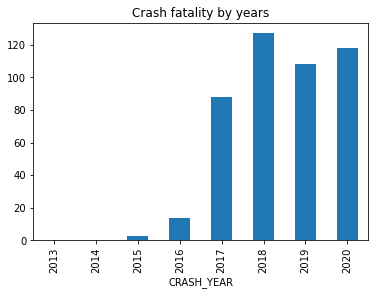

In [116]:
deadly = df[['CRASH_YEAR', 'INJURIES_FATAL']]
deadly = deadly.groupby(['CRASH_YEAR' ])['INJURIES_FATAL'].sum()
print(deadly)

deadly.plot(x ='CRASH_YEAR', title ='Crash fatality by years', kind = 'bar')

### Question 5. Investigate number and type of injuries based on the speed limit.

**Answer - I am comparing incapacitating, non-incapacitating and fatal injuries by the speed limit. After finding the data, I don't see any major difference incomparison to speed limit with the injuries. Speed limit 30 has the highest number of injury.**

POSTED_SPEED_LIMIT
0       63.0
5       20.0
10      49.0
15     123.0
20     197.0
25     422.0
30    6421.0
35     909.0
40     184.0
45     111.0
50       2.0
55      13.0
60       0.0
65       1.0
70       0.0
Name: INJURIES_INCAPACITATING, dtype: float64


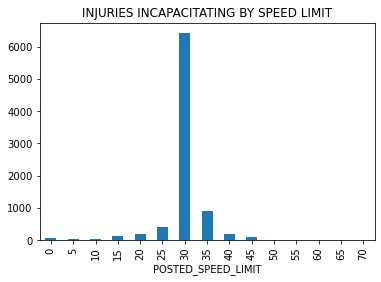

In [107]:
incap = df[['POSTED_SPEED_LIMIT', 'INJURIES_INCAPACITATING']]
incap = incap.groupby(['POSTED_SPEED_LIMIT' ])['INJURIES_INCAPACITATING'].sum()
print(incap)

incap.plot(x ='POSTED_SPEED_LIMIT', title ='INJURIES INCAPACITATING BY SPEED LIMIT', kind = 'bar')

POSTED_SPEED_LIMIT
0       246.0
5        90.0
10      218.0
15      560.0
20      995.0
25     2004.0
30    33767.0
35     4236.0
40      591.0
45      369.0
50        9.0
55       63.0
60        1.0
65        5.0
70        0.0
Name: INJURIES_NON_INCAPACITATING, dtype: float64


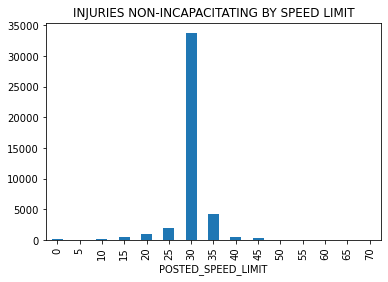

In [104]:
nonIncap = df[['POSTED_SPEED_LIMIT', 'INJURIES_NON_INCAPACITATING']]
nonIncap = nonIncap.groupby(['POSTED_SPEED_LIMIT' ])['INJURIES_NON_INCAPACITATING'].sum()
print(nonIncap)

nonIncap.plot(x ='POSTED_SPEED_LIMIT', title ='INJURIES NON-INCAPACITATING BY SPEED LIMIT', kind = 'bar')


POSTED_SPEED_LIMIT
0       3.0
5       2.0
10      3.0
15     11.0
20      9.0
25     32.0
30    322.0
35     48.0
40     11.0
45      8.0
50      0.0
55      0.0
60      0.0
65      0.0
70      0.0
Name: INJURIES_FATAL, dtype: float64


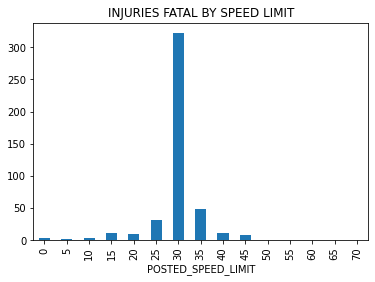

In [126]:
fatalInjury = df[['POSTED_SPEED_LIMIT', 'INJURIES_FATAL']]
fatalInjury = fatalInjury.groupby(['POSTED_SPEED_LIMIT' ])['INJURIES_FATAL'].sum()
print(fatalInjury)
fatalInjury.plot(x ='POSTED_SPEED_LIMIT', title ='INJURIES FATAL BY SPEED LIMIT', kind = 'bar')


### Question 6. Is there a relationship between hit and run crashes and number of fatal injuries?

**Answer - Firstly, there were empty rows that I replaced to N("No") since I assume that means those cases weren't hit and run. As shown below, there are some cases in which hit and run crashes let into fatal injuries**

HIT_AND_RUN_I
N    390.0
Y     68.0
Name: INJURIES_FATAL, dtype: float64


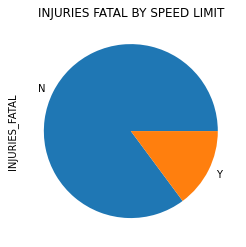

In [100]:
hitRun = df[['HIT_AND_RUN_I', 'INJURIES_FATAL']]
hitRun = hitRun.groupby(['HIT_AND_RUN_I' ])['INJURIES_FATAL'].sum()
print(hitRun)
hitRun.plot(x ='HIT_AND_RUN_I', y ='INJURIES_FATAL', title ='INJURIES FATAL BY SPEED LIMIT', kind = 'pie')

### Question 7.  Do intersection-related crashes result in more fatal injuries?


**Answer - There were empty rows that I replaced to N("No") since I assume that means those cases weren't intersection-related crashes. As shown below, there are some cases in which intersection-related crashes let into fatal injuries**

INTERSECTION_RELATED_I
N    390.0
Y     68.0
Name: INJURIES_FATAL, dtype: float64


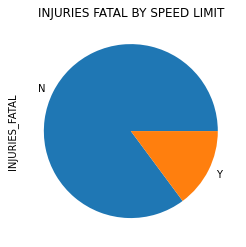

In [101]:
interRelated = df[['INTERSECTION_RELATED_I', 'INJURIES_FATAL']]
interRelated = interRelated.groupby(['INTERSECTION_RELATED_I' ])['INJURIES_FATAL'].sum()
print(interRelated)
interRelated.plot(x ='INTERSECTION_RELATED_I', y ='INJURIES_FATAL', title ='INJURIES FATAL BY SPEED LIMIT', kind = 'pie')

### Question 8. Try to include visualization with your answer to these questions.


**Answer - I have included visualization for the work that I have done.**

### Question 9. Come up with at least two more interesting insights and visualize them. (Suggestions: Season/weather/road condition and fatalities, or hit and run, ... } )


**1.I am getting the insight if the road defect have any affect to crashes. By looking at the graph, we can say that mostly no defects are reason for crashes.**

**2.I am getting the insight in what lighting condition more crashes are 
happening. From the graph, we can tell that more crashes are in daylight
compared that to darkness.**

ROAD_DEFECT
DEBRIS ON ROADWAY       376
NO DEFECTS           362428
OTHER                  2394
RUT, HOLES             4043
SHOULDER DEFECT         965
WORN SURFACE           1728
Name: ROAD_DEFECT, dtype: int64


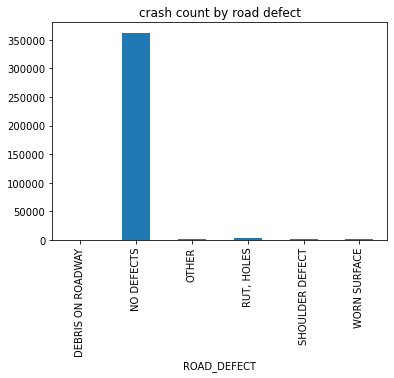

In [130]:
rdDefect = df[['ROAD_DEFECT']]
rdDefect = rdDefect.groupby(['ROAD_DEFECT'])['ROAD_DEFECT'].count()
print(rdDefect)
rdDefect.plot(x ='ROAD_DEFECT', title ='crash count by road defect', kind = 'bar')

LIGHTING_CONDITION
DARKNESS                   22369
DARKNESS, LIGHTED ROAD     93280
DAWN                        7697
DAYLIGHT                  292532
DUSK                       13639
UNKNOWN                    15968
Name: LIGHTING_CONDITION, dtype: int64


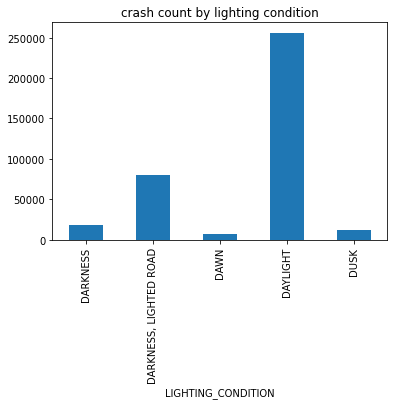

In [131]:
lightCond = df[['LIGHTING_CONDITION']]
lightCond = lightCond.groupby(['LIGHTING_CONDITION'])['LIGHTING_CONDITION'].count()
print(cras)
lightCond.plot(x ='LIGHTING_ONDITION', title ='crash count by lighting condition', kind = 'bar')